In [1]:
#https://www.kaggle.com/surya635/house-price-prediction/notebook
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import cross_validation as cv

import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

/Users/h/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def read_data(path_read):
    df= pd.read_csv(path_read)
    print( path_read )
    return df

path_read= 'data/data.csv'
df = read_data(path_read)
df.shape

data/data.csv


(451, 97)

In [3]:
df= df[ df['price'].notnull() ] #remove price missing data 
df['price'].head()

4       549000.0
7       895000.0
8      2500000.0
10      999999.0
13    17000000.0
Name: price, dtype: float64

In [342]:
cols= ['city_id',
 'state_id',
 'zipcode',
 'country_id',
 'is_rental',
 'is_commercial',
 'rent',
 'price',
 'floor',
 'num_bedrooms',
 'area',
 'x',
 'y',
 'num_rooms',
 'num_bathrooms',
 'pets',
 'ownership_id',
 'is_new_development',
 'common_charges',
 'is_furnished',
 'financing_allowed',
 'commission']
df= df[cols]
df.head()

,city_id,state_id,zipcode,country_id,is_rental,is_commercial,rent,price,floor,num_bedrooms,...,y,num_rooms,num_bathrooms,pets,ownership_id,is_new_development,common_charges,is_furnished,financing_allowed,commission
4,1.0,43.0,10018.0,231.0,0,0,NaN,549000.0,7,0.0,...,40.749278,1.0,1.0,1.0,3.0,0,NaN,0,100.0,NaN
7,1.0,43.0,10017.0,231.0,0,0,NaN,895000.0,NaN,1.0,...,40.753295,3.0,1.0,6.0,15.0,0,785.0,0,90.0,NaN
8,1.0,43.0,10009.0,231.0,0,0,NaN,2500000.0,NaN,3.0,...,40.729759,5.0,2.5,1.0,15.0,0,1393.0,0,90.0,NaN
10,1.0,43.0,10019.0,231.0,0,0,NaN,999999.0,31,1.0,...,40.762831,4.0,1.0,1.0,15.0,0,1103.0,0,NaN,NaN
13,1.0,43.0,10010.0,231.0,0,1,NaN,17000000.0,Ground Floor,NaN,...,40.743045,NaN,NaN,5.0,21.0,0,NaN,0,75.0,0.0


In [343]:
df.shape

(228, 22)

In [344]:
#you can also check the data set information using the info() command. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 4 to 448
Data columns (total 22 columns):
city_id               228 non-null float64
state_id              228 non-null float64
zipcode               227 non-null float64
country_id            228 non-null float64
is_rental             228 non-null int64
is_commercial         228 non-null int64
rent                  0 non-null float64
price                 228 non-null float64
floor                 158 non-null object
num_bedrooms          207 non-null float64
area                  179 non-null float64
x                     228 non-null float64
y                     228 non-null float64
num_rooms             174 non-null float64
num_bathrooms         210 non-null float64
pets                  223 non-null float64
ownership_id          228 non-null float64
is_new_development    228 non-null int64
common_charges        151 non-null float64
is_furnished          228 non-null int64
financing_allowed     209 non-null float64
com

/Users/h/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


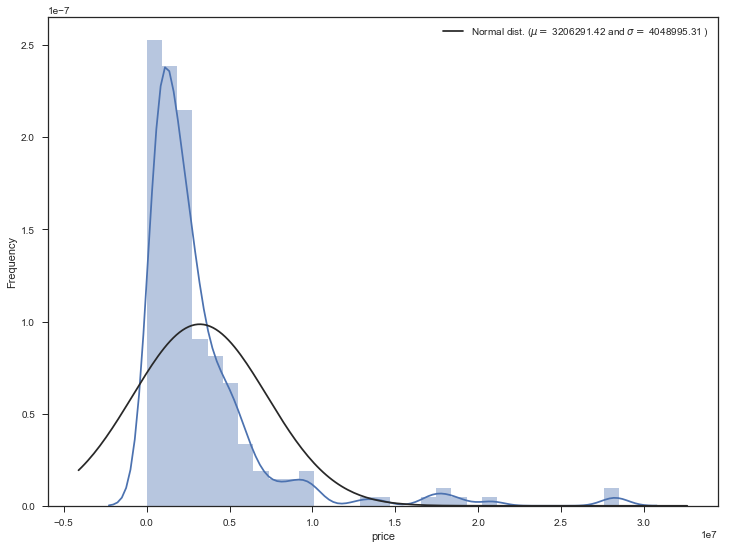

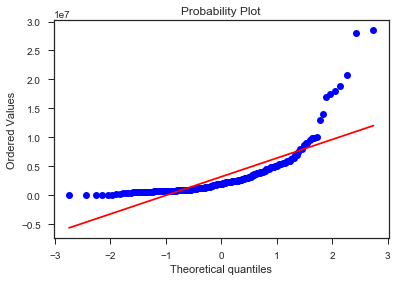

In [345]:
plt.subplots(figsize=(12,9))

price= df['price']
price= price.dropna()

sns.distplot(price, fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(price)

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(price, plot=plt)
plt.show()

In [346]:
#Let's check if the data set has any missing values. 
df.columns[df.isnull().any()]

Index(['zipcode', 'rent', 'floor', 'num_bedrooms', 'area', 'num_rooms',
       'num_bathrooms', 'pets', 'common_charges', 'financing_allowed',
       'commission'],
      dtype='object')

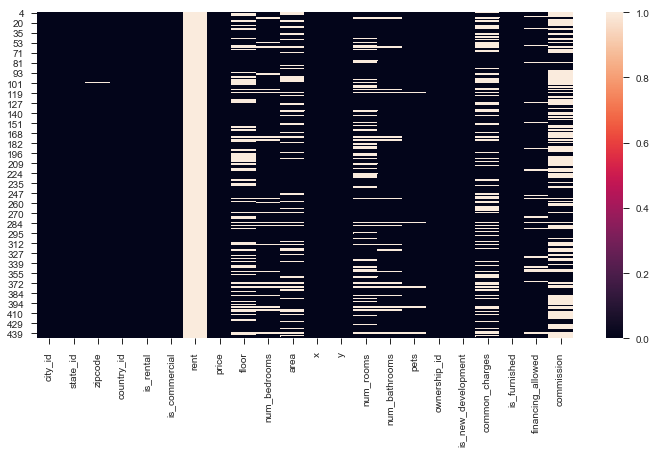

In [347]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

In [348]:
#missing value counts in each of these columns
Isnull = df.isnull().sum()/len(df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

rent                 100.000000
commission            52.631579
common_charges        33.771930
floor                 30.701754
num_rooms             23.684211
area                  21.491228
num_bedrooms           9.210526
financing_allowed      8.333333
num_bathrooms          7.894737
pets                   2.192982
zipcode                0.438596
dtype: float64

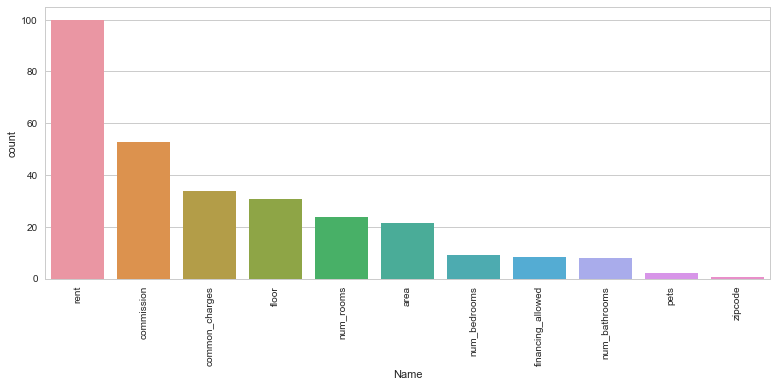

In [349]:
#Convert into dataframe
Isnull = Isnull.to_frame()
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index

#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [350]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
df_corr = df.select_dtypes(include=[np.number])

In [351]:
df_corr.shape

(228, 21)

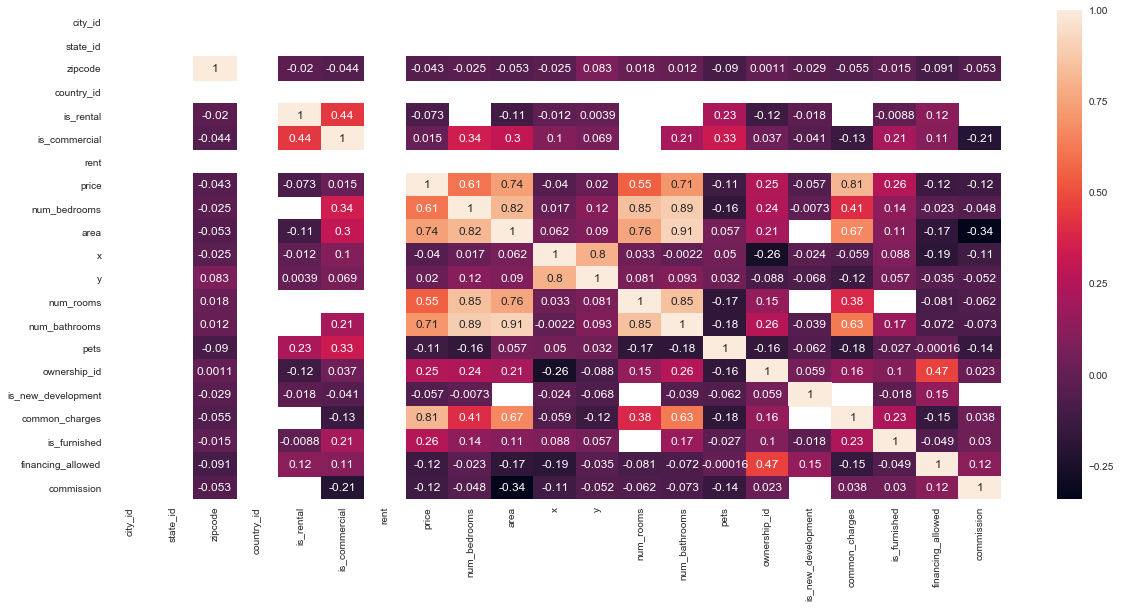

In [352]:
#Coralation plot
corr = df_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

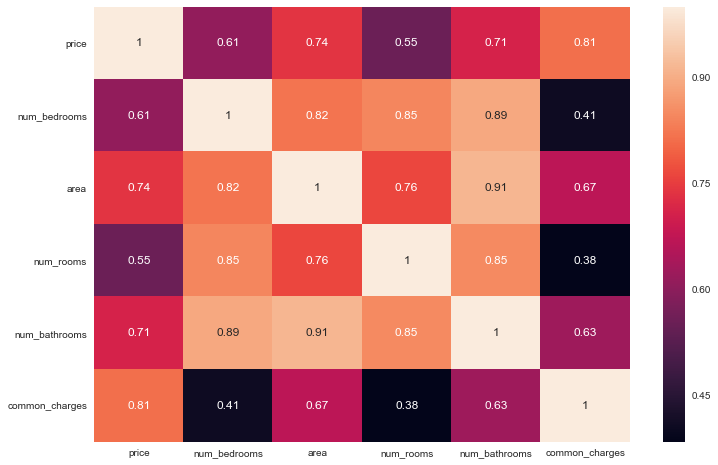

In [353]:
top_feature = corr.index[abs(corr['price']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [354]:
df.num_bedrooms.unique()

array([0. , 1. , 3. , nan, 4. , 5. , 7. , 2. , 1.5, 2.3, 0.5, 3.5, 6. ])

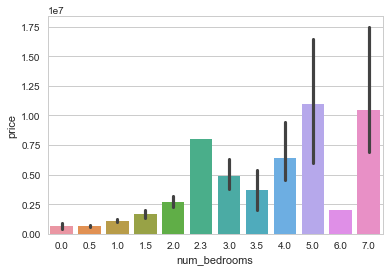

In [355]:
sns.barplot(df.num_bedrooms, df.price)

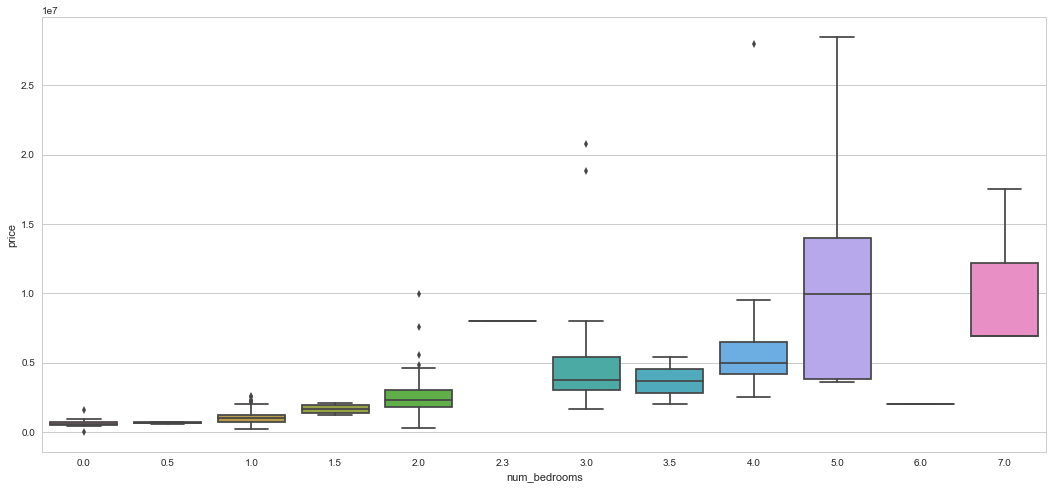

In [356]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=df.num_bedrooms, y=df.price)

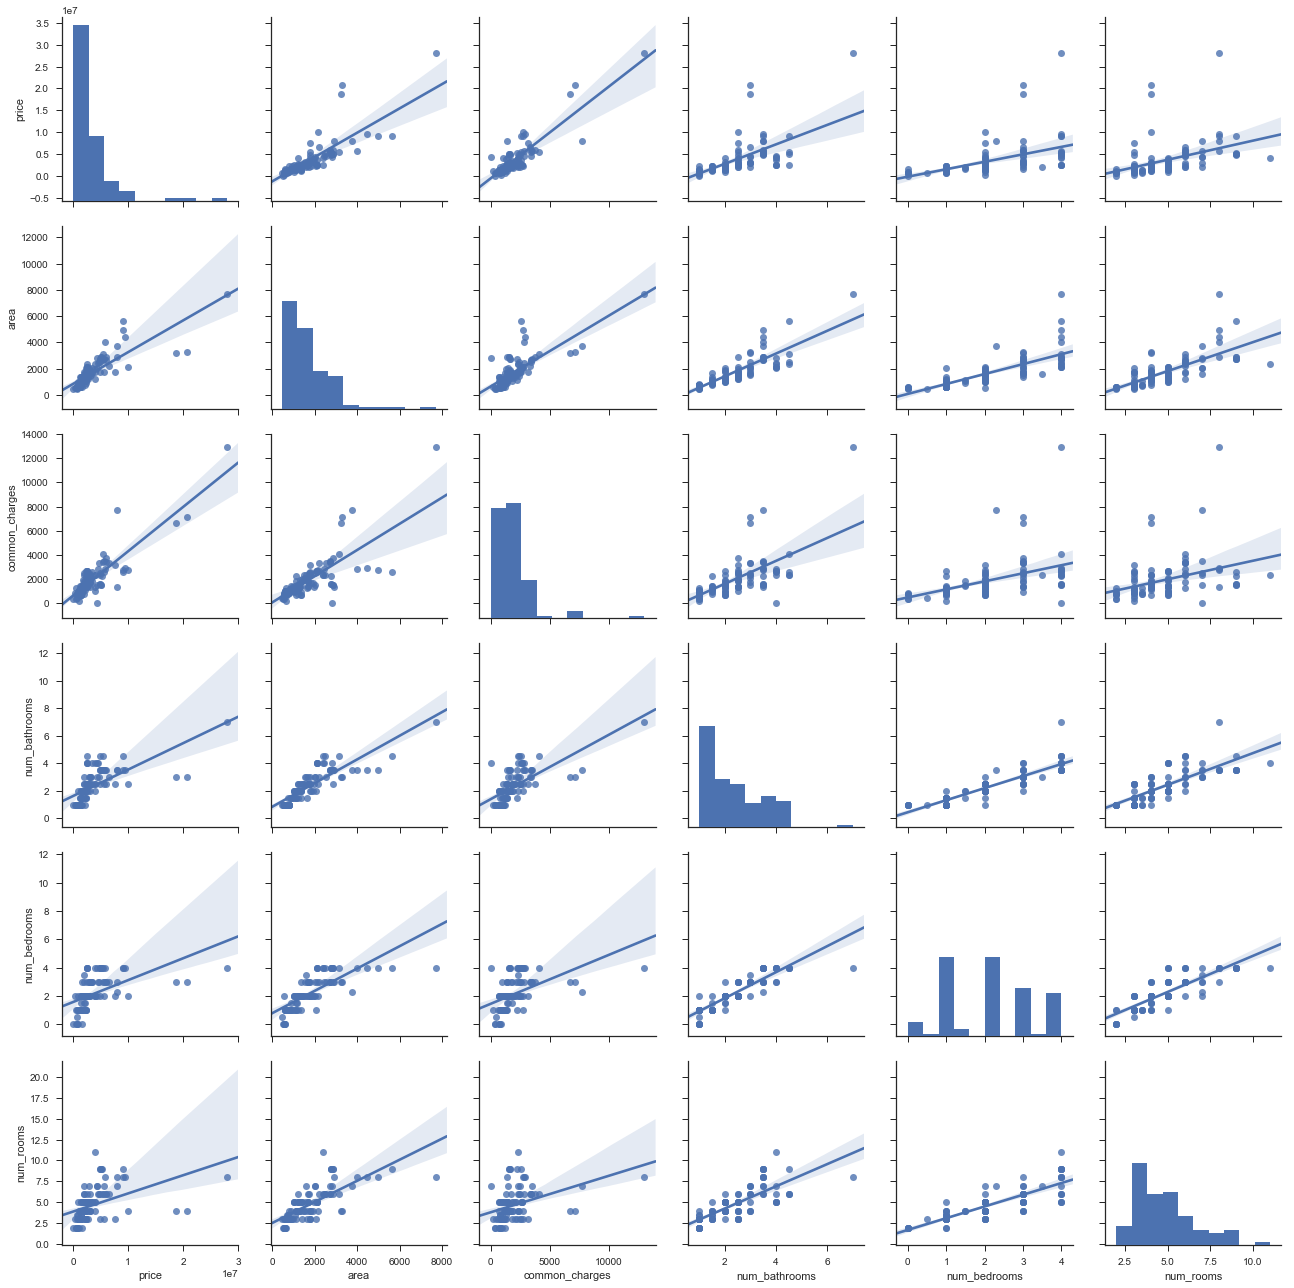

In [357]:
cols= [ 'price',
        'area',
        'common_charges',
        'num_bathrooms',
        'num_bedrooms',
        'num_rooms'
        #'ownership_id',
        #'is_commercial'
     ]

sns.set(style='ticks')
sns.pairplot(df[cols].dropna(), size=3, kind='reg')

In [358]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(['price'], ascending=False, inplace=True)
corr.price

Find most important features relative to target


price                 1.000000
common_charges        0.812652
area                  0.738120
num_bathrooms         0.709532
num_bedrooms          0.609566
num_rooms             0.553729
is_furnished          0.257733
ownership_id          0.249579
y                     0.020395
is_commercial         0.014679
x                    -0.040383
zipcode              -0.042572
is_new_development   -0.056812
is_rental            -0.073448
pets                 -0.113236
commission           -0.120733
financing_allowed    -0.122471
city_id                    NaN
state_id                   NaN
country_id                 NaN
rent                       NaN
Name: price, dtype: float64

In [359]:
cols= [ 'price',
        'area',
        'common_charges',
        'num_bathrooms',
        'num_bedrooms',
        'num_rooms']

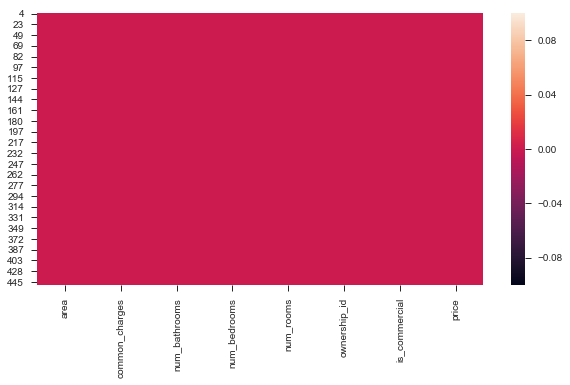

In [360]:
df= df[cols]

#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())